# Ch04. 시험성적 처리하기

이번 단원의 실습 내용

<img src=https://i.ibb.co/wdXKRHC/04-00.png, width=300>

## 1. csv 파일에서 데이터프레임 불러오기

**csv 파일이란?**

<img src=https://i.ibb.co/nnySkZc/04-01.png, width=600>


> pandas read_csv

csv파일을 데이터프레임으로 불러오는 함수

----------
**filepath_or_buffer**

파일의 경로명

**sep** (인수는 문자열 / 기본값은 ',')

구분자를 지정하는 인자

**header** (인수는 정수, 정수의 리스트 / 기본값은 'infer')

columns를 지정하는 인자. 지정하지 않으면 대부분 맨 윗줄이 columns가 된다.(기본 값이 0인것과 비슷하다)

리스트로 지정하면 멀티 인덱스인 columns가 된다.


**index_col** (인수는 정수, 정수의 리스트 / 기본값은 None)

index를 지정하는 인자. 지정하지 않으면 RangeIndex가 index로 부여된다. 리스트로 지정하면 멀티 인덱스인 index가 된다.


[read_csv 함수 설명 블로그](https://kimpanda.tistory.com/78)

[read_csv 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

이번 강의에서 사용할 csv 파일 주소

https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv

In [1]:
# 프로젝트 코드
import pandas as pd
pd.set_option('display.max_rows', 8) # 8행까지만 출력하는 코드
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'

In [2]:
# csv 파일에서 데이터 프레임 불러오기
df_ex1 = pd.read_csv(url)
df_ex1

,이름,점수
0,노성빈,22
1,문주용,52
2,최태주,71
3,황혁범,53
...,...,...
96,신민기,22
97,지도훈,24
98,류형석,41
99,유남길,67


In [3]:
# info 함수로 데이터 확인하기
df_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      100 non-null    object
 1   점수      100 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [4]:
# describe 함수로 데이터 확인하기
df_ex1.describe()

,점수
count,100.000000
mean,50.890000
std,18.143588
min,20.000000
25%,35.750000
50%,50.500000
75%,65.500000
max,79.000000


## 2. feature engineering이란?

<img src=https://i.ibb.co/zZdfspc/04-02.png, width=600>

**feature engineering**

- 번역하면 특성공학이지만 뜻이 와닿지는 않는다. 데이터 가공하기라는 표현도 쓴다

- 일반적으로 원시(raw) 데이터에서는 열은 특성, 행은 개체를 나타낸다

- 기존 열(feature)을 가공해 더 유용한 특성을 가지는 열을 만드는 것이 feature engineering이다

## 3. 등수 매기기(rank)

> pandas rank


<img src=https://i.ibb.co/s5g5fxw/04-03.png, width=600>

데이터 프레임이나 시리즈의 순위를 매기는 함수



**method** (인수는 ‘average’, ‘min’, ‘max’, ‘first’, ‘dense’ / 기본 값은 ‘average’)

동점자 처리방식을 지정하는 인자

- average: 평균 순위
- min: 최소 순위
- max: 최대 순위
- first: 출현 순서에 따라 순위 부여
- dense: ‘min’ 과 같지만 동점자가 여러명 있어도  다음 순위가 1을 더해서  부여한다

 ex. 90, 89, 89, 88을 각각 1, 2, 2, 3을 부여한다 (4위가 아니라 3위를 부여한다)

**ascending** (인수는 bool / 기본 값은 True)

오름차순과 내림차순을 결정하는 인자, 기본값은 오름차순 (True)

[rank 함수 설명 블로그](https://kimpanda.tistory.com/77)

[rank 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html)

In [5]:
# 실습준비코드
import pandas as pd
data = [['송중기', 91, 82, 17], ['권보아', 82, 95, 17],
        ['김나현', 71, 95, 18], ['박효신', 90, 72, 18],
        ['김선미', 80, 72, 19], ['강승주', 78, 95, 19]]
df = pd.DataFrame(data, columns=['이름', '영어', '국어', '나이'])
df1 = df.copy() # df와 똑같은 데이터프레임을 복사해 df1으로 선언
df

,이름,영어,국어,나이
0,송중기,91,82,17
1,권보아,82,95,17
2,김나현,71,95,18
3,박효신,90,72,18
4,김선미,80,72,19
5,강승주,78,95,19


In [6]:
# 영어열로 오름차순으로 등수매기기 (원본 보존을 위해 df1으로 실습합니다)
df1['영어오름'] = df1['영어'].rank()
df1

,이름,영어,국어,나이,영어오름
0,송중기,91,82,17,6.0
1,권보아,82,95,17,4.0
2,김나현,71,95,18,1.0
3,박효신,90,72,18,5.0
4,김선미,80,72,19,3.0
5,강승주,78,95,19,2.0


In [7]:
# 영어열로 내림차순으로 등수매기기
df1['영어내림'] = df1['영어'].rank(ascending=False)
df1

,이름,영어,국어,나이,영어오름,영어내림
0,송중기,91,82,17,6.0,1.0
1,권보아,82,95,17,4.0,3.0
2,김나현,71,95,18,1.0,6.0
3,박효신,90,72,18,5.0,2.0
4,김선미,80,72,19,3.0,4.0
5,강승주,78,95,19,2.0,5.0


In [8]:
# 국어열로 오름차순으로 등수매길때 동점자를 다르게
df1['average'] = df1['국어'].rank()
df1['min'] = df1['국어'].rank(method='min')
df1['max'] = df1['국어'].rank(method='max')
df1['first'] = df1['국어'].rank(method='first')
df1['dense'] = df1['국어'].rank(method='dense')
df1

,이름,영어,국어,나이,영어오름,영어내림,average,min,max,first,dense
0,송중기,91,82,17,6.0,1.0,3.0,3.0,3.0,3.0,2.0
1,권보아,82,95,17,4.0,3.0,5.0,4.0,6.0,4.0,3.0
2,김나현,71,95,18,1.0,6.0,5.0,4.0,6.0,5.0,3.0
3,박효신,90,72,18,5.0,2.0,1.5,1.0,2.0,1.0,1.0
4,김선미,80,72,19,3.0,4.0,1.5,1.0,2.0,2.0,1.0
5,강승주,78,95,19,2.0,5.0,5.0,4.0,6.0,6.0,3.0


rank 함수에 대해서 더 공부가 필요한 분들은 아래 강의를 참고하세요



*   [엑셀투파이썬 채널 rank 강의](https://youtu.be/ooMCVlXCdNU)

## 4. 자료형 바꾸기(astype)

> pandas astype


<img src=https://i.ibb.co/NYSwdZD/04-04.png, width=600>

데이터 프레임이나 시리즈의 자료형을 바꾸는 함수




**dtype**

자료형을 지정하는 인자. dtype을 입력하면 된다

특정 열에만 적용하고 싶을 경우 열의 레이블과 자료형을 딕셔너리로 넣으면 된다

ex> A열은 문자열로 B열은 정수로 바꾸고 싶을 경우 dtype인자에  {'A':'str', 'B':'int'}을 인수로 입력하면 된다


<br><br>


[astype 함수 설명 블로그](https://kimpanda.tistory.com/80)

[astype 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html)


In [9]:
# 실습준비코드
import pandas as pd
data = [[8.2, 9, '17'], [7.1, 9, '18'], [9.3, 7, '18'], [7.8, 7, '19']]
df = pd.DataFrame(data, columns=['A', 'B', 'C'])
df1 = df.copy() # df와 똑같은 데이터프레임을 복사해 df1으로 선언
df

,A,B,C
0,8.2,9,17
1,7.1,9,18
2,9.3,7,18
3,7.8,7,19


In [10]:
# df1의 자료형 파악하기
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
 2   C       4 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [11]:
# 데이터 프레임의 자료형을 문자열로 바꾸기
df1.astype('str').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      object
 2   C       4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [12]:
# 데이터 프레임의 자료형을 정수로 바꾸기
df1.astype('int').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       4 non-null      int64
 1   B       4 non-null      int64
 2   C       4 non-null      int64
dtypes: int64(3)
memory usage: 224.0 bytes


In [13]:
# 특정열의 자료형 바꾸기1
df1['C'] = df1['C'].astype('int')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
 2   C       4 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 224.0 bytes


In [14]:
# 특정열의 자료형 바꾸기2
df.astype({'C':'int'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      int64  
 2   C       4 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 224.0 bytes


In [15]:
# 여러열의 자료형 바꾸기2
df.astype({'A': 'str', 'C':'int'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       4 non-null      object
 1   B       4 non-null      int64 
 2   C       4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 224.0+ bytes


**프로젝트에서 등수 열을 만들어주자**

가장 높은 점수가 1등이 되는 오름차순에 동점자는 최소순위를 부여하자

In [16]:
# 프로젝트 코드
import pandas as pd

url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1

,이름,점수
0,노성빈,22
1,문주용,52
2,최태주,71
3,황혁범,53
...,...,...
96,신민기,22
97,지도훈,24
98,류형석,41
99,유남길,67


In [17]:
# 등수열 만들기
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
df_ex1

,이름,점수,등수
0,노성빈,22,94
1,문주용,52,49
2,최태주,71,19
3,황혁범,53,47
...,...,...,...
96,신민기,22,94
97,지도훈,24,90
98,류형석,41,69
99,유남길,67,24


## 5. 데이터 프레임 필터링하기 (불리언 인덱싱)

**불리언 인덱싱(boolean indexing 이란?**

<img src=https://i.ibb.co/qg31xWJ/04-05-1.png, width=600>

- bool 배열로 인덱싱하는 기법

- 불리언 인덱싱에 들어가는 배열은 리스트가 아니라 시리즈도 가능하다

- 시리즈는 단순 연산만으로 쉽게 불리언(boolean) 시리즈로 만들 수 있으므로 이 특성과 합쳐져 불리언 인덱싱은 판다스의 필터링으로 쓰인다


<img src=https://i.ibb.co/pX1Xs30/04-05-2.png, width=600>

**불리언 인덱싱에서의 조건문**

위 그림에서 보이는 조건문은


```python
df['국어'] > 80
```

그저 True와 False로 이루어진 시리즈이다

명령어가 아님에 주의하고 시리즈이기 때문에 변수로 지정도 가능하다

```python
cond1 = df['국어'] > 80
```
조건문이 쓰이는 자리에 변수 cond1을 대신 입력할 수 있다.

복잡한 조건문일때 조건문을 변수로 지정하면 코드가 간결해지므로 변수로 지정해 사용하자

In [18]:
# 실습 준비 코드
import pandas as pd

data = [[85, 96, 94], [79, 87, 94], [93, 85, 73], [81, 84, 88]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

,국어,영어,수학
A,85,96,94
B,79,87,94
C,93,85,73
D,81,84,88


In [19]:
# 행을 불리언 인덱싱 (대괄호 인덱싱이나 loc 인덱싱으로 가능)
df.loc[[True, False, True, True]]
df[[True, False, True, True]]

,국어,영어,수학
A,85,96,94
C,93,85,73
D,81,84,88


In [20]:
# 열을 불리언 인덱싱 (loc 인덱싱으로 가능)
df.loc[:, [True, False, True]]

,국어,수학
A,85,94
B,79,94
C,93,73
D,81,88


In [21]:
df['국어'] > 80

,국어
A,True
B,False
C,True
D,True


In [22]:
# 국어점수가 80점보다 큰 사람만 필터링
df[df['국어'] > 80]

,국어,영어,수학
A,85,96,94
C,93,85,73
D,81,84,88


In [23]:
# 평균이 85점 이상인 사람만 필터링
df[df.mean(axis=1) >= 85]

,국어,영어,수학
A,85,96,94
B,79,87,94


In [24]:
# 2차원 배열로 불리언 인덱싱을 할때
df[df > 80]

,국어,영어,수학
A,85.0,96,94.0
B,NaN,87,94.0
C,93.0,85,NaN
D,81.0,84,88.0


**프로젝트에서 필터링을 해보자**

- 1등의 명단을 추출해보자
- 40점 초과인 데이터만 추출해보자

In [25]:
# 프로젝트 코드
import pandas as pd

url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
df_ex1

,이름,점수,등수
0,노성빈,22,94
1,문주용,52,49
2,최태주,71,19
3,황혁범,53,47
...,...,...,...
96,신민기,22,94
97,지도훈,24,90
98,류형석,41,69
99,유남길,67,24


In [26]:
# 1등(공동1등 포함)의 명단 추출하기
df_ex1.loc[df_ex1['등수'] == 1, '이름']

,이름
35,구은탁
37,민일택
93,문지용


In [27]:
# 40점 이하는 낙제이다. 낙제가 아닌 성적만 필터링
df_ex1[df_ex1['점수'] > 40]

,이름,점수,등수
1,문주용,52,49
2,최태주,71,19
3,황혁범,53,47
5,주기원,44,63
...,...,...,...
94,양호근,58,39
95,차지우,61,30
98,류형석,41,69
99,유남길,67,24


불리언 인덱싱에 대해서 더 공부가 필요한 분들은 아래 강의를 참고하세요



*   [엑셀투파이썬 채널 불리언 인덱싱 강의](https://youtu.be/poaOpqec8ho)

## 6. 조건에 따라 값 부여하기(불리언 마스킹)

**불리언 마스킹(boolean masking)이란?**

if문 처럼 참, 거짓에(boolean) 따라 값을 부여하는는 것(masking)

> pandas mask

<img src=https://i.ibb.co/vP4MstR/04-06.png, width=600>

True or False(bool)에 따라 값을 씌우는(masking) 함수

즉 불리언 마스킹을 하는 함수 (boolean masking)



  

**cond** (인수는 bool 시리즈, 데이터프레임)

조건문처럼 작동하는 True 또는 False의 배열을  입력받는 인자  mask 함수는 True일 때의 값을  바꾼다.

조건문의 기능을 하는 것이지 실제로는 명령어가 아니고 bool 시리즈나 데이터프레임인 배열이다(그래서 변수로 지정 가능하다)





**other** (인수는 스칼라 , 시리즈, 데이터프레임, 함수 / 기본값은 nan)

조건문이 True일 때 바꿀 값을 지정하는 인자. 기본값은 NaN이다





In [28]:
# 실습 준비 코드
import pandas as pd
list1 = [85, 79, 93, 81]
data = [[85, 96, 94], [79, 87, 94], [93, 85, 73], [81, 84, 88]]
df = pd.DataFrame(data, index=list('ABCD'), columns=['국어', '영어', '수학'])
df

,국어,영어,수학
A,85,96,94
B,79,87,94
C,93,85,73
D,81,84,88


In [29]:
# 리스트의 불리언 마스킹 (각자 실습해 보세요)
result = []
for i in list1:
  if i > 80:
    result.append('합격')
  else:
    result.append('불합격')
print(list1)
print(result)

# 리스트 내포(List Comprehension)을 사용하면 한줄 코드로 가능합니다
['합격' if i > 80 else '불합격' for i in list1]

[85, 79, 93, 81]
['합격', '불합격', '합격', '합격']


['합격', '불합격', '합격', '합격']

In [30]:
# 데이터프레임에 mask를 적용해 80보다 큰 데이터를 합격으로 바꾸기
cond1 = df > 80
df.mask(cond1, '합격')

,국어,영어,수학
A,합격,합격,합격
B,79,합격,합격
C,합격,합격,73
D,합격,합격,합격


In [31]:
# 80보다 큰 데이터는 합격 80보다 작은 데이터는 불합격
df.mask(cond1, '합격').mask(~cond1, '불합격')

,국어,영어,수학
A,합격,합격,합격
B,불합격,합격,합격
C,합격,합격,불합격
D,합격,합격,합격


In [32]:
# 시리즈에 mask 함수 적용해 국어열 수정하기
df1 = df.copy()
cond2 = df1['국어'] <= 80
df1['국어'] = df1['국어'].mask(cond2, '불합격')
df1

,국어,영어,수학
A,85,96,94
B,불합격,87,94
C,93,85,73
D,81,84,88


In [33]:
# 다시 df와 같은 원본으로 실습해 80이하는 불합격 80이상은 합격으로
df1 = df.copy()
df1['국어'] = df1['국어'].mask(cond2, '불합격').mask(~cond2, '합격')
df1

,국어,영어,수학
A,합격,96,94
B,불합격,87,94
C,합격,85,73
D,합격,84,88


In [34]:
# 다시 df와 같은 원본으로 실습하고 위 결과를 별도의 열로 만들기
df1 = df.copy()
df1['국어성적'] = df1['국어'].mask(cond2, '불합격').mask(~cond2, '합격')
df1

,국어,영어,수학,국어성적
A,85,96,94,합격
B,79,87,94,불합격
C,93,85,73,합격
D,81,84,88,합격


In [35]:
# numpy 함수 np.where으로도 가능하다
import numpy as np
df1 = df.copy()
df1['국어성적'] = np.where(cond2, '불합격','합격')
df1

,국어,영어,수학,국어성적
A,85,96,94,합격
B,79,87,94,불합격
C,93,85,73,합격
D,81,84,88,합격


In [36]:
# other에 시리즈도 넣을 수 있으니 각자 실습해보자
df1 = df.copy()
cond3 = df1['영어'] > df1['국어']
df1['국어'] = df1['국어'].mask(cond3, df1['영어'])
df1 # 영어 점수가 국어 점수보다 크면 영어 점수로 국어 점수를 대체한 df1

,국어,영어,수학
A,96,96,94
B,87,87,94
C,93,85,73
D,84,84,88


**프로젝트에서 불리언 마스킹(boolean masking)을 해보자**

점수가 40점 초과라면 패스, 40점 이하라면 낙제를 갖는 비고열을 만들어보자

In [37]:
# 프로젝트 코드
import pandas as pd

url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
df_ex1

,이름,점수,등수
0,노성빈,22,94
1,문주용,52,49
2,최태주,71,19
3,황혁범,53,47
...,...,...,...
96,신민기,22,94
97,지도훈,24,90
98,류형석,41,69
99,유남길,67,24


In [38]:
# 점수가 40이하면 낙제 40초과면 패스인 비고 열을 만들자
cond1 = df_ex1['점수'] > 40
df_ex1['비고'] = df_ex1['점수'].mask(cond1, '패스').mask(~cond1, '낙제')
df_ex1

,이름,점수,등수,비고
0,노성빈,22,94,낙제
1,문주용,52,49,패스
2,최태주,71,19,패스
3,황혁범,53,47,패스
...,...,...,...,...
96,신민기,22,94,낙제
97,지도훈,24,90,낙제
98,류형석,41,69,패스
99,유남길,67,24,패스


In [39]:
# np.where 함수를 사용하면 아래와 같이 가능하다
import numpy as np
df_ex1['비고'] = np.where(cond1, '패스', '낙제')
df_ex1

,이름,점수,등수,비고
0,노성빈,22,94,낙제
1,문주용,52,49,패스
2,최태주,71,19,패스
3,황혁범,53,47,패스
...,...,...,...,...
96,신민기,22,94,낙제
97,지도훈,24,90,낙제
98,류형석,41,69,패스
99,유남길,67,24,패스


mask함수와 불리언 마스킹에 대해서 더 공부가 필요한 분들은 아래 강의를 참고하세요



*   [엑셀투파이썬 채널 mask 강의](https://youtu.be/_5KaKUfCWm4)

## 7. 범주화해서 학점 매기기(cut)

학점과 같이 구간을 나눠서 특정 값을 부여하는 것은 [merge_asof](https://kimpanda.tistory.com/70) 함수나 [mask](https://kimpanda.tistory.com/82) 함수로 가능하지만 둘다 코드가 복잡해진다

- 그럴 때 cut 함수를 사용하면 손쉽게 그룹을 나눠 범주화해서 학점을 매길 수 있다

> pandas cut

<img src=https://i.ibb.co/fv6BWLp/04-07-1.png, width=600>

숫자와 같은 데이터를 구간별로 나눠서 범주화(categorization)하는 함수



**x** (인수는 배열)

구간을 나눌 배열을 입력받는 인자. 반드시 1차원이어야 한다





**bins** (인수는 정수, 순서의 배열)

구간을 나누는 기준을 입력받는 인자

- 정수 : 정수만큼의 균등한 구간으로 분할한다
- 순서의 배열  : ex1) [0, 20, 40, 60] 이라면 0 ~ 20, 20 ~ 40, 40 ~ 60 까지의 3개의 구간으로 분할한다


**right** (인수는 bool / 기본값은 True)

구간에서 우측 경계를 포함할지 여부를 결정하는 인자

- ex1의 경우에 True라면 우측 경계를 해당 구간에 포함하므로 0초과 20이하, 20초과 40이하, 40초과 60이하로 분할한다





**labels** (인수는 배열 또는  False / 기본값은 None)

구간의 레이블을 지정하는 인자.  False는 가장 왼쪽 구간부터 0, 1, 2, 3... 으로 레이블을 부여한다

- 기본값은 구간의 경계를 구간의 레이블로 부여한다

- ex1의 경우라면 (0, 20], (20, 40], (40. 60] 으로 부여한다

- 반드시 bins 인자로 나누어진 구간수와 같아야 한다

<br><br>

[cut 함수 설명 블로그](https://kimpanda.tistory.com/83)

[cut 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)


In [1]:
# 실습 준비코드
import pandas as pd
s = pd.Series([71, 92, 77, 70])
s

,0
0,71
1,92
2,77
3,70


In [2]:
# 구간 분류하기
pd.cut(s, [0, 70, 80, 90, 100])

,0
0,"(70, 80]"
1,"(90, 100]"
2,"(70, 80]"
3,"(0, 70]"


In [3]:
# 구간 분류해 레이블을 코드화 하기
pd.cut(s, [0, 70, 80, 90, 100], labels=False)

,0
0,1
1,3
2,1
3,0


In [4]:
# 구간 분류해 지정한 레이블을 부여하기
pd.cut(s, [0, 70, 80, 90, 100], labels=['F', 'C', 'B', 'A'])

,0
0,C
1,A
2,C
3,F


**프로젝트에서 학점을 부여해보자**

<img src=https://i.ibb.co/PC39Hvt/04-07-2.png, width=200>

In [5]:
# 프로젝트 코드
import pandas as pd
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
cond1 = df_ex1['점수'] > 40
df_ex1['비고'] = df_ex1['점수'].mask(cond1, '패스').mask(~cond1, '낙제')
df_ex1

,이름,점수,등수,비고
0,노성빈,22,94,낙제
1,문주용,52,49,패스
2,최태주,71,19,패스
3,황혁범,53,47,패스
4,서석훈,22,94,낙제
...,...,...,...,...
95,차지우,61,30,패스
96,신민기,22,94,낙제
97,지도훈,24,90,낙제
98,류형석,41,69,패스


In [6]:
# 학점 열 만들기
df_ex1['학점'] = pd.cut(df_ex1['점수'], bins=[0, 40, 50, 60, 70, 80], labels=['F', 'D', 'C', 'B', 'A'])
df_ex1

,이름,점수,등수,비고,학점
0,노성빈,22,94,낙제,F
1,문주용,52,49,패스,C
2,최태주,71,19,패스,A
3,황혁범,53,47,패스,C
4,서석훈,22,94,낙제,F
...,...,...,...,...,...
95,차지우,61,30,패스,B
96,신민기,22,94,낙제,F
97,지도훈,24,90,낙제,F
98,류형석,41,69,패스,D


## 8. category 자료형

pandas에는 category 자료형을 다루는 수많은 함수와 속성(attribute)이 있다

처음 판다스를 배우면 category에 대해서 얼마만큼 공부해야할지 고민이 되는 부분이다

category 자료형을 사용하는 주 목적은 아래와 같으니 해당 목적이 필요할 때 공부하면 된다


<img src=https://i.ibb.co/W0Zw2hj/04-08.png, width=500>

category 자료형은 판다스 입문자용이 아니고 숙련자를 위한 자료형이니 느긋하게 마음을 갖기 바란다

In [ ]:
# 수업 준비코드
import pandas as pd
pd.set_option('max_rows', 6)
s = pd.Series(['S', 'M', 'XL']*10000000)
s

0            S
1            M
2           XL
            ..
29999997     S
29999998     M
29999999    XL
Length: 30000000, dtype: object

In [ ]:
# category 자료형은 메모리를 크게 절약해준다
print(s.memory_usage())
print(s.astype('category').memory_usage())

240000128
30000260


In [ ]:
# Categorical 함수로 category 자료형으로 바꾸면 순서를 부여할 수 있다
s1 = pd.Series(pd.Categorical(s, categories=['S', 'M', 'XL'], ordered=True))
s1

0            S
1            M
2           XL
            ..
29999997     S
29999998     M
29999999    XL
Length: 30000000, dtype: category
Categories (3, object): ['S' < 'M' < 'XL']

In [ ]:
# s1을 S와 M, XL 순서로 정렬가능(알파벳 순서로는 오름, 내림차순 모두 불가능)
s1.sort_values()

0            S
8486343      S
27171216     S
            ..
15000020    XL
15000026    XL
29999999    XL
Length: 30000000, dtype: category
Categories (3, object): ['S' < 'M' < 'XL']

## 9. 빈도수 파악하기(value_counts) 및 시각화(plot)

> pandas value_counts


<img src=https://i.ibb.co/PtQvx0Y/04-09.png, width=600>



데이터 프레임이나 시리즈의 고유값의 개수를 파악하는 함수

시리즈에 적용할 때는 아래와 같다


```python
s.value_counts(normalize=False, sort=True, ascending=False)
```

**normalize** (인수는 bool / 기본값은 False)

True일때는 표준화해서 비율로 보여준다



**sort** (인수는 bool / 기본값은 True)

빈도에 따라 정렬한다



**ascending** (인수는 bool / 기본값은 False)

정렬 방식을 결정하는 인자, 기본값은 내림차순

---

데이터 프레임에 적용할 때는 아래와 같다


```python
df.value_counts(subset=None, normalize=False, sort=True, ascending=False)
```




**subset** (인수는 레이블 / 기본값은 None)

고유값의 개수를 파악할 열을 지정하는 인자





그외의 인자는 시리즈에 적용할 때와 동일하다


<br><br>


 [value_counts 함수 설명 블로그](https://kimpanda.tistory.com/84)

[시리즈에서 value_counts 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)

[데이터프레임에서 value_counts 판다스 공식문서](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts)


In [ ]:
# 실습 준비코드
import pandas as pd
data = [['A', 'a'], ['A', 'b'], ['C', 'a'], ['B', 'b'], ['A', 'a']]
df = pd.DataFrame(data, columns=['col1', 'col2'])
df

,col1,col2
0,A,a
1,A,b
2,C,a
3,B,b
4,A,a


In [ ]:
# 시리즈에 value_counts 함수를 적용해 col1의 개수 파악
df['col1'].value_counts()

A    3
C    1
B    1
Name: col1, dtype: int64

In [ ]:
# 위 결과를 비율로
df['col1'].value_counts(normalize=True)

A    0.6
C    0.2
B    0.2
Name: col1, dtype: float64

In [ ]:
# 데이터프레임에 value_counts 함수를 적용해 col1의 개수 파악
df.value_counts('col1')

col1
A    3
B    1
C    1
dtype: int64

In [ ]:
# 데이터프레임에 value_counts 함수를 적용해 col1과 col2의 조합 파악
df.value_counts(['col1', 'col2'])

col1  col2
A     a       2
      b       1
B     b       1
C     a       1
dtype: int64

In [ ]:
# subset에 모든 열을 담는다면 기본값으로도 가능
df.value_counts()

col1  col2
A     a       2
      b       1
B     b       1
C     a       1
dtype: int64

**프로젝트에서 각 학점별 인원수를 파악해보자**

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.set_option('max_rows', 6) # 6행까지만 출력하는 코드
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'
df_ex1 = pd.read_csv(url)
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')
cond1 = df_ex1['점수'] > 40
df_ex1['비고'] = df_ex1['점수'].mask(cond1, '패스').mask(~cond1, '낙제')

# 학점 열 만들기
df_ex1['학점'] = pd.cut(df_ex1['점수'], bins=[0, 40, 50, 60, 70, 80], labels=['F', 'D', 'C', 'B', 'A'])
df_ex1

,이름,점수,등수,비고,학점
0,노성빈,22,94,낙제,F
1,문주용,52,49,패스,C
2,최태주,71,19,패스,A
...,...,...,...,...,...
97,지도훈,24,90,낙제,F
98,류형석,41,69,패스,D
99,유남길,67,24,패스,B


In [ ]:
# 각 학점당 인원수 구하기
df_ex1['학점'].value_counts()

F    30
D    20
A    20
C    16
B    14
Name: 학점, dtype: int64

In [ ]:
# 각 학점의 비율 구하기
df_ex1['학점'].value_counts(normalize=True)

F    0.30
D    0.20
A    0.20
C    0.16
B    0.14
Name: 학점, dtype: float64

In [ ]:
# A부터 F순서를 원하면 index를 정렬하면 된다 (category라서 내림차순)
df_ex1['학점'].value_counts().sort_index(ascending=False)

A    20
B    14
C    16
D    20
F    30
Name: 학점, dtype: int64

sort_index 함수가 궁금하다면 링크 참조


[https://kimpanda.tistory.com/85](https://kimpanda.tistory.com/85)

In [ ]:
import pandas as pd
s = pd.Series([1, 2, 3, 4], index=list('ACBD'))
s

A    1
C    2
B    3
D    4
dtype: int64

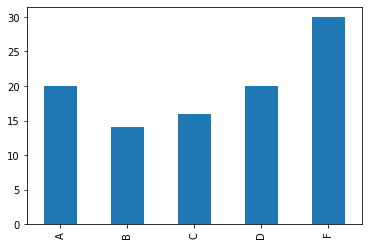

In [ ]:
# 각 학점당 숫자를 그래프로
df_ex1['학점'].value_counts().sort_index(ascending=False).plot(kind='bar')

## 10. 요약

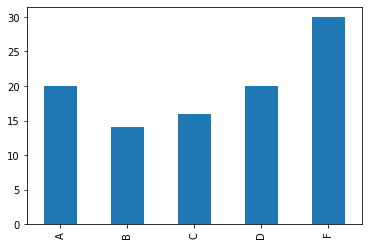

In [ ]:
# 프로젝트 코드
import pandas as pd
pd.set_option('max_rows', 6) # 6행까지만 출력하는 코드
url = 'https://raw.githubusercontent.com/panda-kim/pandas/main/ch04.csv'

# csv 파일에서 데이터 프레임 부르기
df_ex1 = pd.read_csv(url)

# 등수 매기기
df_ex1['등수'] = df_ex1['점수'].rank(method='min', ascending=False).astype('int')

# 낙제(40점이하)와 패스를 구분한 비고 열 만들기
cond1 = df_ex1['점수'] > 40
df_ex1['비고'] = df_ex1['점수'].mask(cond1, '패스').mask(~cond1, '낙제')

# 학점 열 만들기
bin = [0, 40, 50, 60, 70, 80]
label = ['F', 'D', 'C', 'B', 'A']
df_ex1['학점'] = pd.cut(df_ex1['점수'], bins=bin, labels=label)

# 각 학점당 인원수 파악하고 그래프로 그리기
df_ex1['학점'].value_counts().sort_index(ascending=False).plot(kind='bar')